## Imports

In [1]:
import pathlib

import numpy as np
import matplotlib.pyplot as plt
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [84]:
import tensorflow as tf

# Since I have downloaded a pre-splitted data I will define the path to it
train_dir = '/Users/irenzo/Downloads/Main Academy Notebooks/Lesson 26/Data/Data/train'
test_dir = '/Users/irenzo/Downloads/Main Academy Notebooks/Lesson 26/Data/Data/test'
valid_dir = '/Users/irenzo/Downloads/Main Academy Notebooks/Lesson 26/Data/Data/valid'

# Image dimensions and batch size
img_height = 350
img_width = 450
batch_size = 32

# Training dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='int',  
    seed=123)

# Test dataset
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='int',  
    seed=123)

# Validation dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
    valid_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='int',
    seed=123)

class_names = train_ds.class_names
print('Class names:', class_names)

Found 613 files belonging to 4 classes.
Found 315 files belonging to 4 classes.
Found 72 files belonging to 4 classes.
Class names: ['adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib', 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa', 'normal', 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa']


In [83]:
# What is the size of our images
from PIL import Image

image_path = r'/Users/irenzo/Downloads/Main Academy Notebooks/Lesson 26/Data/Data/test/adenocarcinoma/000122 (4).png'

try:
    with Image.open(image_path) as img:
        width, height = img.size

    print(f'The image size is: {width}x{height}')

except FileNotFoundError as e:
    print(e)
except Exception as e:
    print(e)


The image size is: 450x350


In [70]:
# Data loading and training runtime optimization
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [100]:
# Building a first model
num_classes = len(class_names)

model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    
    layers.RandomFlip('horizontal', input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.2),
    
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Dropout(0.2,),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    
    layers.Dense(num_classes)
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_23 (Rescaling)    (None, 350, 450, 3)       0         
                                                                 
 random_flip_23 (RandomFlip  (None, 350, 450, 3)       0         
 )                                                               
                                                                 
 random_rotation_23 (Random  (None, 350, 450, 3)       0         
 Rotation)                                                       
                                                                 
 random_zoom_23 (RandomZoom  (None, 350, 450, 3)       0         
 )                                                               
                                                                 
 random_contrast_23 (Random  (None, 350, 450, 3)       0         
 Contrast)                                           

In [101]:
epochs = 20
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs)

Epoch 1/20
20/20 [==============================] - 28s 1s/step - loss: 2.0578 - accuracy: 0.3409 - val_loss: 1.3371 - val_accuracy: 0.4167
Epoch 2/20
20/20 [==============================] - 23s 1s/step - loss: 1.1690 - accuracy: 0.5073 - val_loss: 1.1765 - val_accuracy: 0.5000
Epoch 3/20
20/20 [==============================] - 23s 1s/step - loss: 1.0200 - accuracy: 0.5400 - val_loss: 0.9423 - val_accuracy: 0.4444
Epoch 4/20
20/20 [==============================] - 23s 1s/step - loss: 0.9731 - accuracy: 0.5644 - val_loss: 1.1644 - val_accuracy: 0.4861
Epoch 5/20
20/20 [==============================] - 22s 1s/step - loss: 0.8941 - accuracy: 0.6003 - val_loss: 0.8905 - val_accuracy: 0.5278
Epoch 6/20
20/20 [==============================] - 23s 1s/step - loss: 0.8256 - accuracy: 0.6264 - val_loss: 0.9050 - val_accuracy: 0.5972
Epoch 7/20
20/20 [==============================] - 24s 1s/step - loss: 0.8380 - accuracy: 0.6183 - val_loss: 0.9158 - val_accuracy: 0.5694
Epoch 8/20
20/20 [==

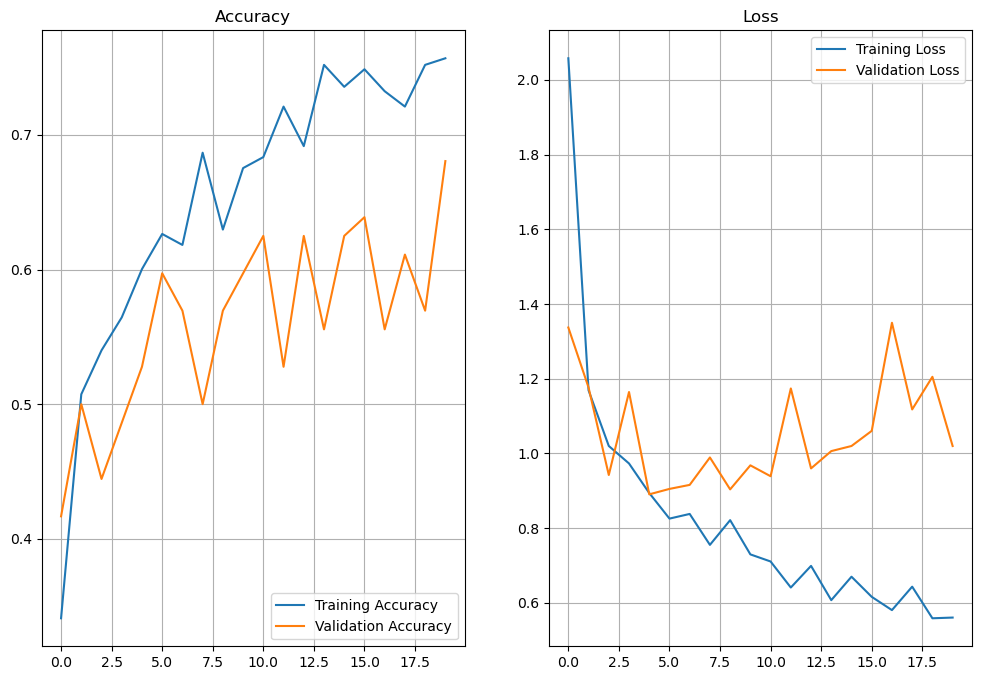

In [102]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.grid()

plt.show()

**We can see the problem of overfitting. Note that training accuracy is increasing from epoch to epoch and losses are decreasing, which illustrates that our model is learning. But at the same time accuracy of the validation set is significantly lower that the accuracy if the training set - that can suggest about problem with generalizing of the data, that is why - overfitting. Also note the validation losses which are significantly higher that train losses and they don't decrease gradually with epochs. 
In this situation I will try to implement regularization L2.**

In [106]:
# Building a model with some tunings 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Rescaling, RandomFlip, RandomRotation, RandomZoom, RandomContrast, Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import L2

img_height = 350
img_width = 450
num_classes = len(class_names)

model = Sequential([
    Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    
    RandomFlip('horizontal'),
    RandomRotation(0.1),
    RandomZoom(0.1),
    RandomContrast(0.2),
    
    Conv2D(16, 3, padding='same', activation='relu', kernel_regularizer=L2(0.005)),
    MaxPooling2D(),
    
    Conv2D(32, 3, padding='same', activation='relu', kernel_regularizer=L2(0.005)),
    MaxPooling2D(),
    
    Conv2D(64, 3, padding='same', activation='relu', kernel_regularizer=L2(0.005)),
    MaxPooling2D(),
    
    Dropout(0.2),
    
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=L2(0.005)),
    
    Dense(num_classes)
])

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

model.summary()


Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_25 (Rescaling)    (None, 350, 450, 3)       0         
                                                                 
 random_flip_25 (RandomFlip  (None, 350, 450, 3)       0         
 )                                                               
                                                                 
 random_rotation_25 (Random  (None, 350, 450, 3)       0         
 Rotation)                                                       
                                                                 
 random_zoom_25 (RandomZoom  (None, 350, 450, 3)       0         
 )                                                               
                                                                 
 random_contrast_25 (Random  (None, 350, 450, 3)       0         
 Contrast)                                           

In [107]:
epochs = 20
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs)

Epoch 1/20
20/20 [==============================] - 25s 1s/step - loss: 2.9835 - accuracy: 0.3312 - val_loss: 2.8221 - val_accuracy: 0.3889
Epoch 2/20
20/20 [==============================] - 23s 1s/step - loss: 2.4015 - accuracy: 0.4013 - val_loss: 2.3151 - val_accuracy: 0.4028
Epoch 3/20
20/20 [==============================] - 21s 1s/step - loss: 2.1570 - accuracy: 0.4225 - val_loss: 2.0653 - val_accuracy: 0.4583
Epoch 4/20
20/20 [==============================] - 23s 1s/step - loss: 2.0042 - accuracy: 0.4470 - val_loss: 1.9819 - val_accuracy: 0.4306
Epoch 5/20
20/20 [==============================] - 23s 1s/step - loss: 1.8878 - accuracy: 0.4568 - val_loss: 1.8181 - val_accuracy: 0.5000
Epoch 6/20
20/20 [==============================] - 22s 1s/step - loss: 1.7901 - accuracy: 0.5188 - val_loss: 1.8153 - val_accuracy: 0.5000
Epoch 7/20
20/20 [==============================] - 22s 1s/step - loss: 1.7682 - accuracy: 0.4943 - val_loss: 1.8347 - val_accuracy: 0.3194
Epoch 8/20
20/20 [==

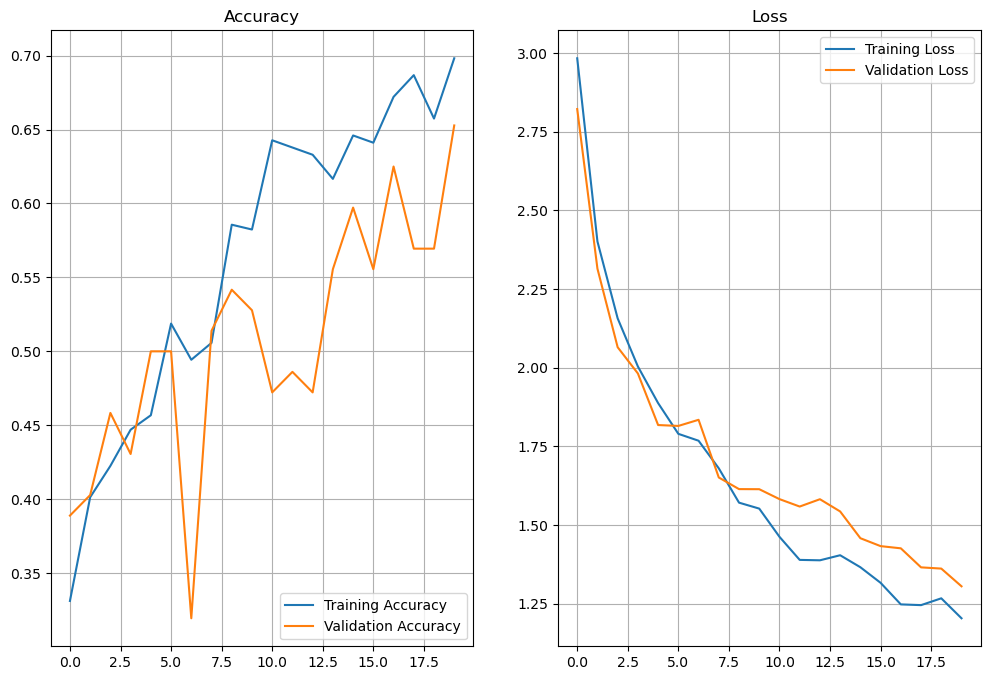

In [108]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.grid()

plt.show()

In [32]:
for subset in [train_ds, val_ds, test_ds]:
    class_counts = np.zeros(num_classes)
    for _, labels in subset:
        class_counts += np.sum(labels, axis=0)
    print(subset, class_counts)


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))> [876. 876. 876. 876.]
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))> [92. 92. 92. 92.]
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))> [429. 429. 429. 429.]


In [33]:
def compute_image_statistics(dataset):
    pixel_means = []
    pixel_stds = []
    for images, _ in dataset:
        pixel_means.append(np.mean(images, axis=(0, 1, 2)))
        pixel_stds.append(np.std(images, axis=(0, 1, 2)))
    overall_mean = np.mean(pixel_means, axis=0)
    overall_std = np.mean(pixel_stds, axis=0)
    return overall_mean, overall_std

train_mean, train_std = compute_image_statistics(train_ds)
val_mean, val_std = compute_image_statistics(val_ds)
test_mean, test_std = compute_image_statistics(test_ds)

print(f"Training set mean: {train_mean}, std: {train_std}")
print(f"Validation set mean: {val_mean}, std: {val_std}")
print(f"Test set mean: {test_mean}, std: {test_std}")


Training set mean: [82.22539 82.21684 82.22566], std: [67.83147 67.82615 67.8314 ]
Validation set mean: [78.57896  78.572975 78.57715 ], std: [60.141468 60.133076 60.13957 ]
Test set mean: [64.42146 64.42165 64.42148], std: [63.893852 63.893944 63.89379 ]


## Saving the model

In [109]:
model.save_weights('model_for_ct_scan.weights.h5')

In [110]:
model.load_weights('model_for_ct_scan.weights.h5')
loss, acc = model.evaluate(train_ds, verbose=2)

20/20 - 5s - loss: 1.0912 - accuracy: 0.7602 - 5s/epoch - 238ms/step


## Testing some image recognition

In [111]:
image_path = '/Users/irenzo/Downloads/Main Academy Notebooks/Lesson 26/Data/Data/test/large.cell.carcinoma/000110.png'
img_height = 350
img_width = 450

img = tf.keras.utils.load_img(image_path, target_size=(img_height, img_width))

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) 

score = tf.nn.softmax(model.predict(img_array)[0])

predicted_class = class_names[np.argmax(score)]
confidence = 100 * np.max(score)
print(f"This image most likely belongs to {predicted_class} with a {confidence:.2f} percent confidence.")

1/1 [==============================] - 0s 58ms/step
This image most likely belongs to large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa with a 71.17 percent confidence.


In [112]:
image_path = '/Users/irenzo/Downloads/Main Academy Notebooks/Lesson 26/Data/Data/test/adenocarcinoma/000117.png'
img_height = 350
img_width = 450

img = tf.keras.utils.load_img(image_path, target_size=(img_height, img_width))

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) 

score = tf.nn.softmax(model.predict(img_array)[0])

predicted_class = class_names[np.argmax(score)]
confidence = 100 * np.max(score)
print(f"This image most likely belongs to {predicted_class} with a {confidence:.2f} percent confidence.")


1/1 [==============================] - 0s 29ms/step
This image most likely belongs to adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib with a 42.19 percent confidence.


In [113]:
image_path = '/Users/irenzo/Downloads/Main Academy Notebooks/Lesson 26/Data/Data/test/squamous.cell.carcinoma/000112.png'
img_height = 350
img_width = 450

img = tf.keras.utils.load_img(image_path, target_size=(img_height, img_width))

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  

score = tf.nn.softmax(model.predict(img_array)[0])

predicted_class = class_names[np.argmax(score)]
confidence = 100 * np.max(score)
print(f"This image most likely belongs to {predicted_class} with a {confidence:.2f} percent confidence.")


1/1 [==============================] - 0s 26ms/step
This image most likely belongs to large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa with a 83.96 percent confidence.


In [114]:
image_path = '/Users/irenzo/Downloads/Main Academy Notebooks/Lesson 26/Data/Data/test/normal/8.png'
img_height = 350
img_width = 450

img = tf.keras.utils.load_img(image_path, target_size=(img_height, img_width))

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  

score = tf.nn.softmax(model.predict(img_array)[0])

predicted_class = class_names[np.argmax(score)]
confidence = 100 * np.max(score)
print(f"This image most likely belongs to {predicted_class} with a {confidence:.2f} percent confidence.")


1/1 [==============================] - 0s 23ms/step
This image most likely belongs to normal with a 99.98 percent confidence.


## Model Evaluation

In [115]:
from sklearn.metrics import classification_report
import numpy as np

def get_metrics(dataset):
    y_true = np.concatenate([y for x, y in dataset], axis=0)
    y_pred = np.argmax(model.predict(dataset), axis=1)
    print(classification_report(y_true, y_pred, target_names=class_names))

# Metrics for training data
print("Training Data Metrics:")
get_metrics(train_ds)

# Metrics for validation data
print("Validation Data Metrics:")
get_metrics(val_ds)

# Metrics for test data
print("Test Data Metrics:")
get_metrics(test_ds)


Training Data Metrics:
20/20 [==============================] - 5s 236ms/step
                                                  precision    recall  f1-score   support

      adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib       0.36      0.36      0.36       195
   large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa       0.15      0.17      0.16       115
                                          normal       0.27      0.30      0.28       148
squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa       0.23      0.18      0.20       155

                                        accuracy                           0.26       613
                                       macro avg       0.25      0.25      0.25       613
                                    weighted avg       0.27      0.26      0.26       613

Validation Data Metrics:
3/3 [==============================] - 1s 151ms/step
                                                  precision    recall  f1-score   support

      adenocarcinoma_left.lowe

# Conclusion

In this educational work I managed to use data augmentation, L2 regularization (lamda tuning) and tuning of learning rate. I used simple custom architecture with 3 convolutional layers.
<br>

**Looking at the metrics we received:**
<br>
1. **Performance on Training Data**:
   - The model does not perform very well even on the training data, with all metrics below 0.40. This indicates that the model might be underfitting, struggling to capture the underlying patterns in the data.

2. **Performance on Validation and Test Data**:
   - The model's performance on the validation and test sets is generally consistent with its performance on the training data, suggesting the model is not overfitting.
   - However, the precision, recall, and F1-scores are relatively low. The model has particularly low recall in some classes, which means it's missing a lot of true positive predictions for those classes.

3. **Imbalance in the Dataset**:
   - The 'support' value, which indicates the number of true instances for each label, shows that there is class imbalance (e.g., 'normal' class in the test set has significantly more instances).
   - The model is performing quite well on the 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa' class in the test data with a recall of 0.67, but poorly on others, especially 'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib'.

4. **Macro vs Weighted Averages**:
   - The macro average considers each class equally, regardless of support, while the weighted average accounts for class imbalance by weighting each class's metrics by its support.
   - The macro average is significantly lower than the weighted average, indicating the model's performance is better on the more prevalent classes.

**What I will do next:**:

- **Address Underfitting**: Since the model is underperforming on the training data, I will consider making my model more complex, increasing the number of layers or the number of units within layers, or using a more sophisticated architecture.
  
- **Class Imbalance**: I will try to explore techniques to handle the class imbalance, such as over-sampling the minority classes, under-sampling the majority classes, or using class weights during training.

- **Hyperparameter Tuning**: I will keep on experimenting with different learning rates, optimizers, and regularization strengths. 

**The point of this particular work was to try using convolutional neural networks. Because of the lack of computational resourses and time restrictions this model is left as it is.**